<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [5]:
!pip install bertopic
!pip install sentence-transformers
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic

# Load the Dataset
# Replace 'dataset.csv' with your dataset file path
df = pd.read_csv('annotated_reviews.csv')

# Display Column Names
print("Available columns in the dataset:", df.columns)

# Identify the Text Column
# Replace 'text_column_name' with the actual column name containing text data
# For example, 'content', 'description', or any relevant column
text_column = input("Enter the column name containing text data: ").strip()

if text_column not in df.columns:
    raise KeyError(f"Column '{text_column}' not found in the dataset.")

# Extract Text Data
documents = df[text_column].dropna()

# Preprocess Text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

documents = documents.apply(preprocess_text)

# Features: Bag-of-Words and TF-IDF
bow_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Generate Document-Term Matrices
bow_matrix = bow_vectorizer.fit_transform(documents)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Latent Dirichlet Allocation (LDA)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(bow_matrix)

lda_feature_names = bow_vectorizer.get_feature_names_out()
lda_topics = [
    [lda_feature_names[i] for i in topic.argsort()[:-11:-1]]
    for topic in lda_model.components_
]

# Latent Semantic Analysis (LSA)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_matrix)

lsa_feature_names = tfidf_vectorizer.get_feature_names_out()
lsa_topics = [
    [lsa_feature_names[i] for i in topic.argsort()[:-11:-1]]
    for topic in lsa_model.components_
]

# BERTopic
bertopic_model = BERTopic()
bertopic_topics, _ = bertopic_model.fit_transform(documents)

# Display Topics
def display_topics(topics, method_name):
    print(f"\n### {method_name} Topics ###")
    for idx, topic in enumerate(topics, 1):
        print(f"Topic {idx}: {', '.join(topic)}")

# Output Results
display_topics(lda_topics, "LDA")
display_topics(lsa_topics, "LSA")

print("\n### BERTopic Topics ###")
print(bertopic_model.get_topic_info().head(10))  # Display top 10 BERTopic clusters


Available columns in the dataset: Index(['document_id', 'clean_text', 'sentiment'], dtype='object')
Enter the column name containing text data: clean_text


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


### LDA Topics ###
Topic 1: movie, scorsese, osage, white, ernest, dicaprio, native, story, hours, moon
Topic 2: film, like, hours, time, great, act, end, story, ending, didn
Topic 3: movie, film, story, time, scorsese, like, long, just, dicaprio, niro
Topic 4: film, scorsese, dicaprio, story, movie, niro, moon, flower, length, killers
Topic 5: movie, like, just, story, people, great, film, dicaprio, does, did
Topic 6: film, osage, scorsese, moon, flower, killers, dicaprio, american, martin, story
Topic 7: osage, scorsese, film, dicaprio, gladstone, people, ernest, niro, killers, like
Topic 8: movie, good, long, story, just, really, didn, did, think, great
Topic 9: ernest, mollie, osage, film, hale, scorsese, family, white, burkhart, character
Topic 10: movie, story, film, just, really, long, like, scorsese, people, great

### LSA Topics ###
Topic 1: movie, film, story, scorsese, osage, just, like, long, time, people
Topic 2: movie, just, good, long, really, didn, like, story, don, gr

**LDA Topics:**

Topic 1:This focuses on the story of the people and the role of scorsese.

Topic 2: Discussion on the general sentiments about the film and its story telling.

Topic 3: It covers the general overview of the  movie and its length and performances.

Topic 4: Highlights the Scorsese-DiCaprio collaboration and the focus on the "Killers of the Flower Moon" story.

Topic 5: Discusses audidences reactions

Topic 6: It focus on the cultural narration around the osage and scorsese's portrayal

Topic 7: Centers on character discussions, particularly Ernest and Mollie and their roles in the narrative.

Topic 8: It reflects the viewers general reactions about the length and story impact.

Topic 9: It explores the characterization of the ernest and mollie.

Topic 10: Summarizes general impressions of the movie, its story, and Scorsese role as a director


**LSA Topics:**

Topic 1: Overview of the movie story and length of the story and direction.

Topic 2: It gives audience reviews on the movies if it is good, long and great.

Topic 3: It mostly focuses on the "moon", "flower", "killers" and "performances" of the movie standards.

Topic 4: It highlightsthe narration and cinematic achievements of the movie.

Topic 5: It focus the actors and their performances like DiCaprio, De Niro, and Gladstone.

Topic 6: it examines the acting and cinematoraphy like actors performance.

Topic 7:Discusses emotional responses and characters, particularly Ernest and Mollie.

Topic 8: Compares the book and the movie, analyzing adaptation choices and character depictions.

Topic 9: Reflects audience engagement with the storytelling, especially regarding historical accuracy.

Topic 10: Covers general impressions of the film, including whether viewers found it "amazing" or "good."

**BERTopic Topics:**

Topic -1: General impressions of the movie. Likely represents noise or overly broad sentiments.

Topic 0: Discusses the films cinematic qualities and performances.

Topic 1: Examines audience reactions and thoughts.

Topic 2: Comments on Scorsese's direction and character arcs.

Topic 3: Analyzes cinematic depth and thematic elements of Scorsese
filmography.

Topic 4: Discusses the importance of the story, likely highlighting the movie historical and cultural relevance.

Topic 5: Focuses on audience experiences watching the film.

Topic 6: Highlights narrative elements and storytelling.

Topic 7: Reflects on performance critiques and technical analysis, with a focus on actors like "leo."


**Summary:**

Among all threee models there are some insights that are observed consistently:
1. LSA focuses on the broad patterns.
2. LDA identifies the detailes clusters and assigning the words with probabilities.
3. BERTopic identifires the clusters based on the word embeddings and frequency.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [10]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
# Replace `your_dataset.csv` with the actual dataset filename
df = pd.read_csv("annotated_reviews.csv")

# Assuming the dataset has two columns: 'text' and 'sentiment'
# 'text' contains the text data, and 'sentiment' contains labels (e.g., positive, negative, neutral)

# Preprocessing: Fill missing values
df['clean_text'] = df['clean_text'].fillna("")

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to top 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize classifiers
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation (5-fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multinomial Naive Bayes
nb_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {nb_scores.mean():.4f}")

# Random Forest
rf_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_scores.mean():.4f}")

# Train and evaluate on the test set
# Naive Bayes
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

# Random Forest
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

# Evaluate performance
def evaluate_model(name, y_true, y_pred):
    print(f"Performance Metrics for {name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("-" * 50)

evaluate_model("Multinomial Naive Bayes", y_test, nb_preds)
evaluate_model("Random Forest", y_test, rf_preds)






Naive Bayes Cross-Validation Accuracy: 0.8488
Random Forest Cross-Validation Accuracy: 0.8488
Performance Metrics for Multinomial Naive Bayes:
Accuracy: 0.8500
Precision: 0.7225
Recall: 0.8500
F1 Score: 0.7811

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        24
     neutral       0.00      0.00      0.00         6
    positive       0.85      1.00      0.92       170

    accuracy                           0.85       200
   macro avg       0.28      0.33      0.31       200
weighted avg       0.72      0.85      0.78       200

--------------------------------------------------
Performance Metrics for Random Forest:
Accuracy: 0.8500
Precision: 0.7225
Recall: 0.8500
F1 Score: 0.7811

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        24
     neutral       0.00      0.00      0.00         6
    positive       0.85      1.00      0.

**TF-IDF**

For the sentiment classification TF-IDF is used for the feature exxtraction method. TF-IDF is used to capture the text relavance and it is used in the dimensionality reduction by limiting the number of features we can reduce the complexity of the computation thorough this process. TF-IDF created a sparse matrix that can help the machine learning models to process efficiently. There is built-in removal of the stop words that ensures the model to focus on the meaningful terms related to the sentiment. Words such as "good," "great," "bad," or "awful" often determine the sentiment of a text. These words are likely to have high TF-IDF scores in sentiment-labeled datasets, making them valuable features for classification.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

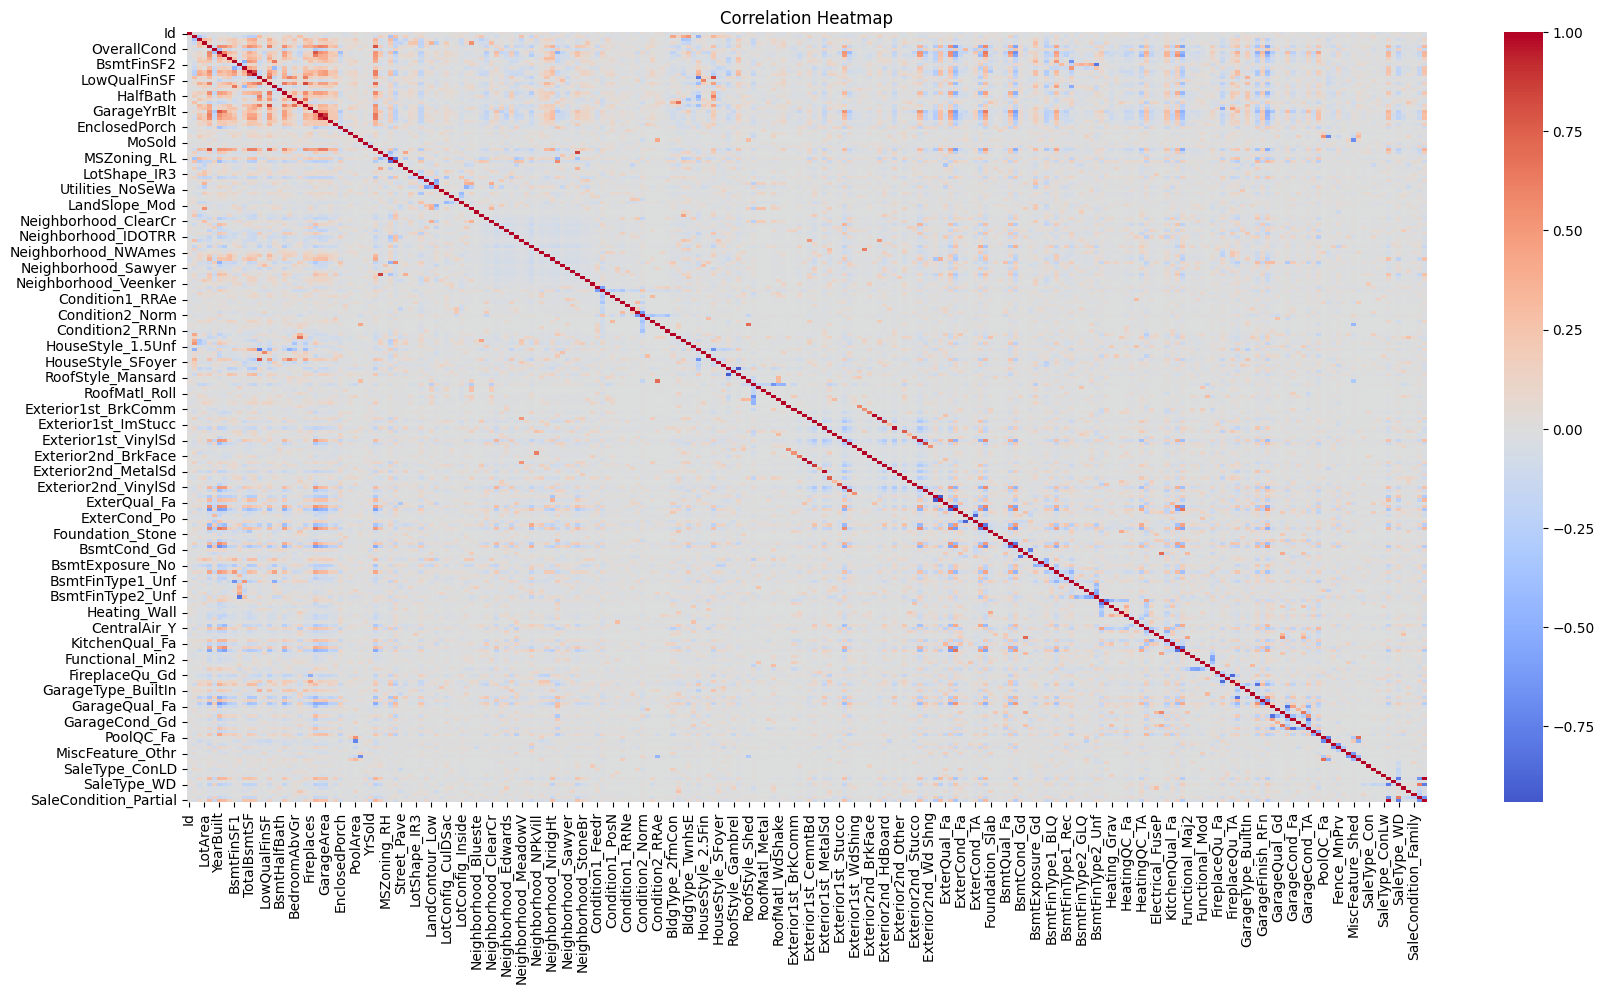

Top Correlated Features:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'Fireplaces',
       'GarageYrBlt'],
      dtype='object')
Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 24868.63
Mean Squared Error (MSE): 1485115043.00
Root Mean Squared Error (RMSE): 38537.19
R^2 Score: 0.81
--------------------------------------------------
Evaluation Metrics for Random Forest:
Mean Absolute Error (MAE): 18863.01
Mean Squared Error (MSE): 880734911.87
Root Mean Squared Error (RMSE): 29677.18
R^2 Score: 0.89
--------------------------------------------------


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the datasets
# Replace 'train.csv' and 'test.csv' with your actual file names
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display basic information about the data
print("Train Dataset Info:")
print(train_data.info())

print("Test Dataset Info:")
print(test_data.info())

# Inspect first few rows
print(train_data.head())

# Target variable
target = 'SalePrice'

# EDA: Check missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print("Missing Values:")
print(missing_values[missing_values > 0])

# Fill missing values
# For numerical columns, fill with median
numerical_cols = train_data.select_dtypes(include=[np.number]).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

# For categorical columns, fill with mode (most frequent value)
categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

# Verify that all missing values are handled
missing_values_after = train_data.isnull().sum().sort_values(ascending=False)
print("Missing Values after Imputation:")
print(missing_values_after[missing_values_after > 0])  # Should be empty now

# Encode categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)

# Correlation heatmap (for feature selection)
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Select features with high correlation to target variable
correlation = train_data.corr()
top_features = correlation[target].sort_values(ascending=False).head(15).index
print("Top Correlated Features:")
print(top_features)

# Split data into train and test sets
X = train_data[top_features].drop(target, axis=1)  # Drop target variable
y = train_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model development
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation metrics
def evaluate_model(name, y_true, y_pred):
    print(f"Evaluation Metrics for {name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 50)

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


PLM selected for sentiment analysis the  **facebook/bart-large-mnli**, it is a pre-trained transformer model from the BART (Bidirectional and Auto-Regressive Transformer) family. This model has been fine-tuned on the Multi-Genre Natural Language Inference (MNLI) dataset to handle zero-shot classification tasks effectively.

1. Pretraining data sources: Pretrained on a combination of publicly available text datasets, including BooksCorpus and English Wikipedia. It was trained to reconstruct corrupted inputs, enabling robust contextual understanding.
2. Number of Parameters: 406 million parameters.
3. Task-Specific Fine-Tuning: Fine-tuned on the MNLI dataset, which involves textual entailment tasks (entailment, neutral, contradiction). This fine-tuning allows it to map textual relationships in a zero-shot classification setting.

In [15]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset containing annotated sentiments
file_path = 'annotated_reviews.csv'  # Specify the correct file path
data = pd.read_csv(file_path)

# Clean the dataset by removing rows with missing values
data = data.dropna(subset=['clean_text', 'sentiment'])

# Select a random subset of data for faster processing
data = data.sample(n=50, random_state=42)  # Adjust the sample size as needed

# Convert sentiment labels to numeric format for evaluation
label_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
data['sentiment_label'] = data['sentiment'].map(label_mapping)

# Initialize the sentiment analysis model using RoBERTa
sentiment_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define the sentiment categories for classification
candidate_labels = ["positive", "negative", "neutral"]

# Use the model to predict sentiments for the text data
predictions = []
for text in data['clean_text']:
    result = sentiment_pipeline(text, candidate_labels)
    predicted_label = result['labels'][0]  # Extract the highest-probability label
    predictions.append(predicted_label)

# Convert predicted labels from text to numeric format
predicted_labels = [label_mapping[label] if label in label_mapping else 2 for label in predictions]

# Compare predictions with actual labels to calculate evaluation metrics
ground_truth = data['sentiment_label']

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(ground_truth, predicted_labels)
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

# Display the evaluation results
print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Results:
Accuracy: 0.4200
Precision: 0.7356
Recall: 0.4200
F1 Score: 0.5218


**Advantages:**
1. This model elimintates the need for task-specific fine-tuning. It saves the computational time and the resourses for the process.
2. It is easily adaptable and customizable to classify the text into any set of the predefined labels.
3. It ensures high performance when there is large-scale pretraining.
4. It is very simple while using the pipeline.

**Disadvantages:**

1. This model needs more memory and the computational power for the long texts.
2. The model has a maximum token limit of 1024 tokens, causing issues when analyzing long documents.
3. It has lower precision in edge cases.
4. The performance heavily relies on the quality and relevance of the candidate labels provided.

There are few challenges encountered while doing this task there are many run time erros that show s the model failes when the input text exceeded the token limit and there is ambiguity in the labels for the neutral class.
